<a href="https://colab.research.google.com/github/ArpitRawat07/Asset_Allocation/blob/main/Markowitz_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.optimize import minimize
import numpy as np
import yfinance as yf

In [ ]:
# Define the list of tickers
tickers = ['AAPL', 'JPM', 'TSLA', 'GOOGL', 'JPM', 'MSFT', 'BAC', 'GS', 'MS','META']

# Fetch historical price data using Yahoo Finance API
data = yf.download(tickers, start='2022-01-01', end='2022-12-31')['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

print(data)

[*********************100%***********************]  9 of 9 completed
                  AAPL        BAC       GOOGL          GS         JPM  \
Date                                                                    
2022-01-03  180.434296  44.483429  144.991501  379.539917  153.338287   
2022-01-04  178.144302  46.226936  144.399506  391.204651  159.151291   
2022-01-05  173.405685  45.446686  137.774994  382.708099  156.241684   
2022-01-06  170.510971  46.361786  137.747498  381.075989  157.901611   
2022-01-07  170.679474  47.373211  137.016998  381.632843  159.466125   
...                ...        ...         ...         ...         ...   
2022-12-23  131.477127  32.005371   89.230003  340.461304  128.420670   
2022-12-27  129.652435  32.064510   87.389999  336.973022  128.870667   
2022-12-28  125.674026  32.301079   86.019997  335.889069  129.574982   
2022-12-29  129.233658  32.665783   88.449997  338.411652  130.318420   
2022-12-30  129.552719  32.646065   88.230003  338.3624

In [ ]:
print(returns)

                AAPL       BAC     GOOGL        GS       JPM      META  \
Date                                                                     
2022-01-04 -0.012692  0.039195 -0.004083  0.030734  0.037910 -0.005937   
2022-01-05 -0.026600 -0.016879 -0.045876 -0.021719 -0.018282 -0.036728   
2022-01-06 -0.016693  0.020136 -0.000200 -0.004265  0.010624  0.025573   
2022-01-07  0.000988  0.021816 -0.005303  0.001461  0.009908 -0.002015   
2022-01-10  0.000116 -0.005083  0.012061  0.004176  0.000957 -0.011212   
...              ...       ...       ...       ...       ...       ...   
2022-12-23 -0.002798  0.002470  0.016750 -0.000202  0.004745  0.007855   
2022-12-27 -0.013878  0.001848 -0.020621 -0.010246  0.003504 -0.009827   
2022-12-28 -0.030685  0.007378 -0.015677 -0.003217  0.005465 -0.010780   
2022-12-29  0.028324  0.011291  0.028249  0.007510  0.005738  0.040131   
2022-12-30  0.002469 -0.000604 -0.002487 -0.000145  0.006606  0.000665   

                  MS      MSFT      T

In [ ]:
# Define the objective function to minimize portfolio risk
def portfolio_variance(weights, returns, cov_matrix):
    portfolio_return = np.sum(returns.mean() * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility


In [ ]:
# Define the constraints for the optimization
def constraint_func(weights):
    return np.sum(weights) - 1

def optimize_portfolio(returns):
    # Calculating Expected returns, Covariance matrix
    expected_returns = returns.mean()
    cov_matrix = returns.cov()

    # Setting the Initial weights (optimization)
    num_assets = len(returns.columns)
    init_weights = np.ones(num_assets) / num_assets

    # Define the optimization bounds and constraints
    bounds = ((0, 1),) * num_assets
    constraints = {'type': 'eq', 'fun': constraint_func}

    # Perform the optimization
    result = minimize(portfolio_variance, init_weights, args=(expected_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result


In [ ]:
# Perform portfolio optimization
result = optimize_portfolio(returns)

# Extract the optimized weights
opt_weights = result.x

# Print the optimized weights
print("Optimized Weights:")
for i in range(len(returns.columns)):
    print(returns.columns[i] + ": {:.2%}".format(opt_weights[i]))


Optimized Weights:
AAPL: 10.95%
BAC: 0.00%
GOOGL: 0.00%
GS: 33.43%
JPM: 39.95%
META: 0.00%
MS: 0.00%
MSFT: 15.68%
TSLA: 0.00%


In [ ]:

# Calculate portfolio returns and volatility
portfolio_returns = np.sum(returns.mean() * opt_weights)
portfolio_volatility = np.sqrt(np.dot(opt_weights.T, np.dot(returns.cov(), opt_weights)))


# Print portfolio returns and volatility
print("Portfolio Returns: {:.2%}".format(portfolio_returns))
print("Portfolio Volatility: {:.2%}".format(portfolio_volatility))


Portfolio Returns: -0.06%
Portfolio Volatility: 1.73%


[*********************100%***********************]  9 of 9 completed
Optimized Weights:
AAPL: 17.56%
BAC: 0.00%
GOOGL: 11.82%
GS: 22.77%
JPM: 24.95%
META: 15.66%
MS: 0.00%
MSFT: 4.91%
TSLA: 2.34%
Portfolio Returns: 0.06%
Portfolio Volatility: 1.24%


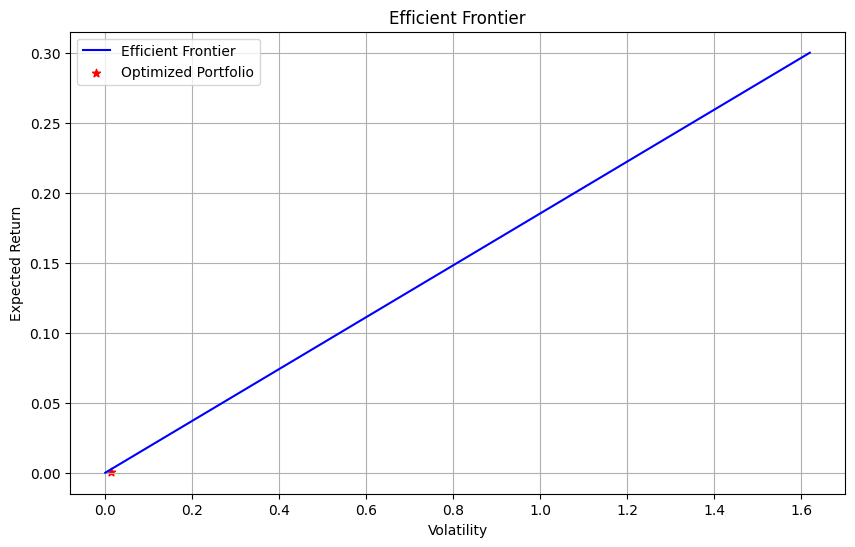

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the list of tickers
tickers = ['AAPL', 'JPM', 'TSLA', 'GOOGL', 'JPM', 'MSFT', 'BAC', 'GS', 'MS', 'META']

# Fetch historical price data using Yahoo Finance API
data = yf.download(tickers, start='2015-01-01', end='2015-12-31')['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

# Calculate expected returns and covariance matrix
expected_returns = returns.mean()
cov_matrix = returns.cov()

# Setting the initial weights (optimization)
num_assets = len(returns.columns)
init_weights = np.ones(num_assets) / num_assets

# Define the objective function to minimize portfolio risk
def portfolio_variance(weights, returns, cov_matrix):
    portfolio_return = np.sum(returns.mean() * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

# Define the constraints for the optimization
def constraint_func(weights):
    return np.sum(weights) - 1

def optimize_portfolio(returns):
    # Define the optimization bounds and constraints
    bounds = ((0, 1),) * num_assets
    constraints = {'type': 'eq', 'fun': constraint_func}

    # Perform the optimization
    result = minimize(portfolio_variance, init_weights, args=(returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)#Sequential Least Squares Programming

    return result

# Perform portfolio optimization
result = optimize_portfolio(returns)

# Extract the optimized weights
opt_weights = result.x





In [ ]:
# Print the optimized weights
print("Optimized Weights:")
for i in range(len(returns.columns)):
    print(returns.columns[i] + ": {:.2%}".format(opt_weights[i]))

# Calculate portfolio returns and volatility
portfolio_returns = np.sum(returns.mean() * opt_weights)
portfolio_volatility = np.sqrt(np.dot(opt_weights.T, np.dot(returns.cov(), opt_weights)))

# Print portfolio returns and volatility
print("Portfolio Returns: {:.2%}".format(portfolio_returns))
print("Portfolio Volatility: {:.2%}".format(portfolio_volatility))

# Define a range of target returns
target_returns = np.linspace(0.0, 0.3, num=100)

# Initialize lists to store portfolio returns and volatilities
efficient_returns = []
efficient_volatility = []



In [ ]:
# Iterate over target returns and optimize portfolio for each target return
for target_return in target_returns:
    # Define a new constraint for the target return
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w * expected_returns) - target_return})

    # Perform the optimization with the updated constraint
    result = minimize(portfolio_variance, init_weights, args=(returns, cov_matrix),
                      method='SLSQP', constraints=constraints)
    opt_weights = result.x

    # Calculate portfolio returns and volatility
    efficient_returns.append(target_return)
    efficient_volatility.append(np.sqrt(np.dot(opt_weights.T, np.dot(cov_matrix, opt_weights))))


In [ ]:
# Convert lists to NumPy arrays
efficient_returns = np.array(efficient_returns)
efficient_volatility = np.array(efficient_volatility)


In [ ]:
# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(efficient_volatility, efficient_returns, color='blue', label='Efficient Frontier')
plt.scatter(portfolio_volatility, portfolio_returns, marker='*', color='red', label='Optimized Portfolio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.legend()
plt.show()
